In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn import decomposition
from tqdm.notebook import tqdm 
from sklearn.preprocessing import StandardScaler, RobustScaler , MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
import collections as cl

In [15]:
customers=pd.read_csv('customers_true.csv')
customers

,CUSTOMER_ID,2018_weekly_expence,2018_weekly_purchasings,2019_weekly_expence,2019_weekly_purchasings,2018_monthly_expence,2018_monthly_purchasings,2019_monthly_expence,2019_monthly_purchasings,avg_expence,...,Spring,Summer,Winter,Acquired,Spent,FIDELTY,cheap,expensive,normal,very expensive
0,AA00312188,12.009259,0.370370,10.169811,0.264151,46.321429,1.428571,44.916667,1.166667,36.702000,...,0.203525,0.134323,0.313265,248.333333,2920.0,0.800000,0.278846,0.115385,0.548077,0.057692
1,AA00312390,5.148148,0.370370,6.018868,0.339623,19.857143,1.428571,26.583333,1.500000,15.730000,...,0.344357,0.215831,0.180408,112.708333,560.0,0.966667,0.396552,0.327586,0.206897,0.068966
2,AA00325975,15.451852,0.407407,16.885849,0.415094,59.600000,1.571429,74.579167,1.833333,39.897143,...,0.221968,0.274261,0.248897,305.909091,6602.5,0.971429,0.336585,0.160976,0.463415,0.039024
3,AA00336843,3.555556,0.222222,6.541509,0.283019,13.714286,0.857143,28.891667,1.250000,21.643182,...,0.384050,0.202481,0.282088,133.333333,3465.0,0.454545,0.217391,0.101449,0.623188,0.057971
4,AA00339761,9.168519,0.296296,4.017925,0.150943,35.364286,1.142857,17.745833,0.666667,29.414706,...,0.352665,0.281052,0.240197,200.625000,2015.0,1.000000,0.050847,0.389831,0.423729,0.135593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25722,YZ04556116,0.000000,0.000000,0.886792,0.037736,0.000000,0.000000,3.916667,0.166667,23.500000,...,0.000000,1.000000,0.000000,295.000000,0.0,0.500000,0.222222,0.111111,0.111111,0.555556
25723,YZ04586406,0.000000,0.000000,14.323585,0.245283,0.000000,0.000000,63.262500,1.083333,54.246667,...,0.000000,0.228479,0.215109,388.000000,0.0,0.600000,0.353659,0.182927,0.451220,0.012195
25724,YZ04658257,0.000000,0.000000,17.783019,0.169811,0.000000,0.000000,78.541667,0.750000,89.163636,...,0.000000,0.124881,0.228011,618.888889,5040.0,1.000000,0.224138,0.224138,0.482759,0.068966
25725,YZ04743693,0.000000,0.000000,1.591509,0.075472,0.000000,0.000000,7.029167,0.333333,17.620000,...,0.000000,0.000000,0.000000,197.000000,0.0,1.000000,0.285714,0.214286,0.285714,0.214286


In [3]:
days=pd.read_csv('customers.csv')
d = days[['Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']]

In [4]:
d.loc[0]

Tuesday       0.0
Wednesday     1.0
Thursday     20.0
Friday        1.0
Saturday      1.0
Sunday        2.0
Name: 0, dtype: float64

In [5]:
with tqdm(total=(len(d))) as pbar:
    for i in range(len(d)):
        sum_ = d.loc[i].sum()
        d.loc[i] = d.loc[i]/sum_
        pbar.update(1)

/Users/pierfrancescomelucci/opt/anaconda3/envs/ENV/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/Users/pierfrancescomelucci/opt/anaconda3/envs/ENV/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [6]:
customers = pd.concat([customers,d],axis=1)
customers

,CUSTOMER_ID,2018_weekly_expence,2018_weekly_purchasings,2019_weekly_expence,2019_weekly_purchasings,2018_monthly_expence,2018_monthly_purchasings,2019_monthly_expence,2019_monthly_purchasings,avg_expence,...,cheap,expensive,normal,very expensive,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,AA00312188,12.009259,0.370370,10.169811,0.264151,46.321429,1.428571,44.916667,1.166667,36.702000,...,0.278846,0.115385,0.548077,0.057692,0.000000,0.040000,0.800000,0.040000,0.040000,0.080000
1,AA00312390,5.148148,0.370370,6.018868,0.339623,19.857143,1.428571,26.583333,1.500000,15.730000,...,0.396552,0.327586,0.206897,0.068966,0.033333,0.000000,0.066667,0.000000,0.900000,0.000000
2,AA00325975,15.451852,0.407407,16.885849,0.415094,59.600000,1.571429,74.579167,1.833333,39.897143,...,0.336585,0.160976,0.463415,0.039024,0.000000,0.000000,0.000000,0.028571,0.971429,0.000000
3,AA00336843,3.555556,0.222222,6.541509,0.283019,13.714286,0.857143,28.891667,1.250000,21.643182,...,0.217391,0.101449,0.623188,0.057971,0.000000,0.045455,0.454545,0.181818,0.272727,0.045455
4,AA00339761,9.168519,0.296296,4.017925,0.150943,35.364286,1.142857,17.745833,0.666667,29.414706,...,0.050847,0.389831,0.423729,0.135593,0.000000,0.000000,0.000000,0.941176,0.000000,0.058824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25722,YZ04556116,0.000000,0.000000,0.886792,0.037736,0.000000,0.000000,3.916667,0.166667,23.500000,...,0.222222,0.111111,0.111111,0.555556,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25723,YZ04586406,0.000000,0.000000,14.323585,0.245283,0.000000,0.000000,63.262500,1.083333,54.246667,...,0.353659,0.182927,0.451220,0.012195,0.000000,0.000000,0.800000,0.200000,0.000000,0.000000
25724,YZ04658257,0.000000,0.000000,17.783019,0.169811,0.000000,0.000000,78.541667,0.750000,89.163636,...,0.224138,0.224138,0.482759,0.068966,0.000000,0.000000,0.000000,0.818182,0.090909,0.090909
25725,YZ04743693,0.000000,0.000000,1.591509,0.075472,0.000000,0.000000,7.029167,0.333333,17.620000,...,0.285714,0.214286,0.285714,0.214286,0.200000,0.800000,0.000000,0.000000,0.000000,0.000000


In [16]:
customers.drop(['2018_weekly_expence','2018_weekly_purchasings',
               '2018_monthly_expence','2018_monthly_purchasings'],
              axis=1,inplace=True)

In [17]:
customers.columns

Index(['CUSTOMER_ID', '2019_weekly_expence', '2019_weekly_purchasings',
       '2019_monthly_expence', '2019_monthly_purchasings', 'avg_expence',
       'CASH', 'CHECK', 'CREDIT CARD', 'DEBIT CARD', 'GIFT CARD', 'afternoon',
       'launch', 'morning', 'night', 'feriale', 'weekend', 'MEMBER_GET_MEMBER',
       'PHONE', 'STORE', 'WEB', 'OTHER_0', 'OTHER_FROZEN', 'SAUCE',
       'READY-MADE', 'POULTRY', 'BEEF_PORK', 'FISH', 'FRIES', 'VEGETABLES',
       'FRUIT', 'ACCESSORIES', 'DRINKS', 'GADGETS', 'OTHER', 'OTHER_MISSING',
       'Fall', 'Spring', 'Summer', 'Winter', 'Acquired', 'Spent', 'FIDELTY',
       'cheap', 'expensive', 'normal', 'very expensive'],
      dtype='object')

In [18]:
customers_b = customers[['CUSTOMER_ID', '2019_monthly_purchasings',
                           'avg_expence',
                    'CASH', 'CHECK', 'CREDIT CARD', 'DEBIT CARD',
                        'cheap', 'expensive']]

In [19]:
to_scale = customers_b.drop('CUSTOMER_ID',axis=1)

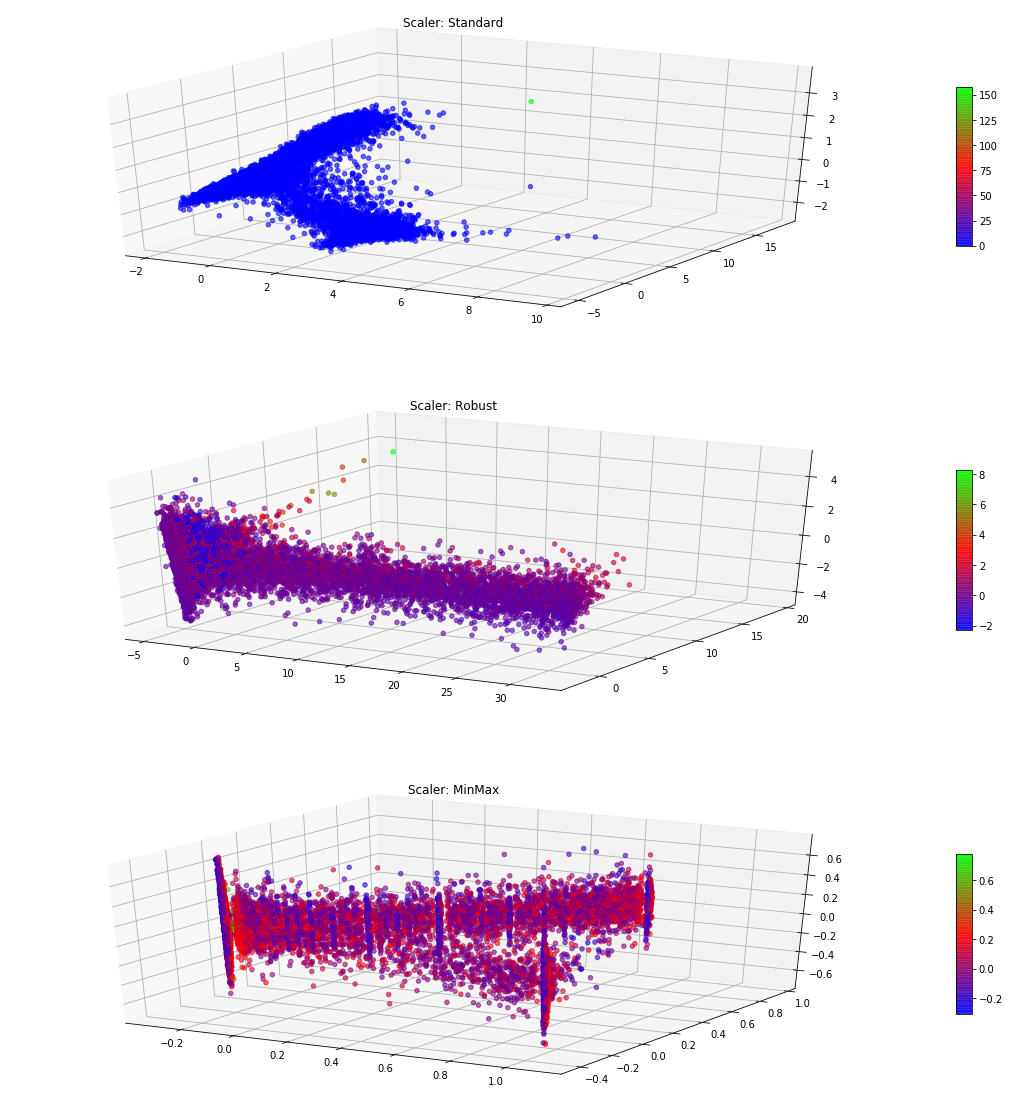

In [20]:
Scalers ={'Standard':StandardScaler(),'Robust':RobustScaler(),
         'MinMax':MinMaxScaler()}
fig = plt.figure(figsize=(20,20))
i = 1
for scaler_name, scaler in Scalers.items():
    scaler.fit(to_scale)
    customers_scaled = scaler.transform(to_scale)
    pca = decomposition.PCA(n_components=5)
    pca.fit(customers_scaled)
    pca_components = pd.DataFrame(pca.transform(customers_scaled))
    
    ax = fig.add_subplot(3, 1, i, projection='3d')
    view = ax.scatter(pca_components[0],pca_components[1],pca_components[2],alpha=0.6,
          c=pca_components[3],cmap="brg")
    ax.set_title('Scaler: {}'.format(scaler_name))
    fig.colorbar(view, shrink=0.5, aspect=10)
    
    i+=1
plt.show() 

In [21]:
scaler = MinMaxScaler()
scaler.fit(to_scale)
customers_scaled = scaler.transform(to_scale)
pca = decomposition.PCA(n_components=3)
pca.fit(customers_scaled)
pca_components = pca.transform(customers_scaled)
explained_variance=0
i=1
for e_v in pca.explained_variance_ratio_:
    explained_variance+=e_v
    print('component',i,'\t',explained_variance)
    i+=1

component 1 	 0.6253706468144291
component 2 	 0.870158087398409
component 3 	 0.9351165713896747


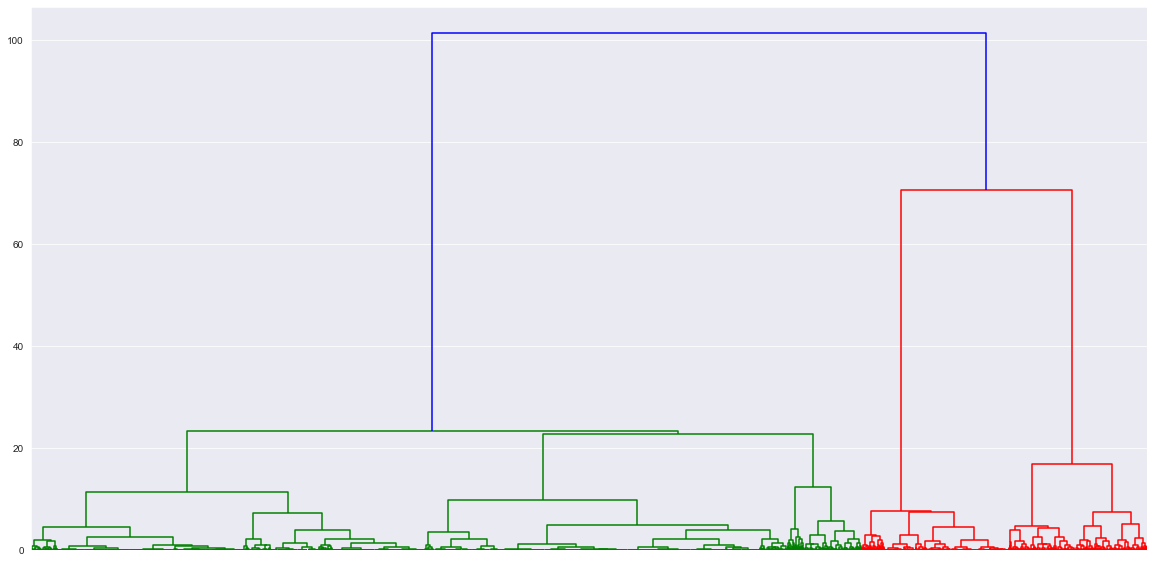

In [501]:
fig, ax = plt.subplots(figsize=(20,10))
Z = linkage(pca_components,method='ward', metric='euclidean')
dendrogram(Z, leaf_rotation=90,ax=ax,no_labels=True);

evaluate for seed: 42



evaluate for seed: 1


No handles with labels found to put in legend.


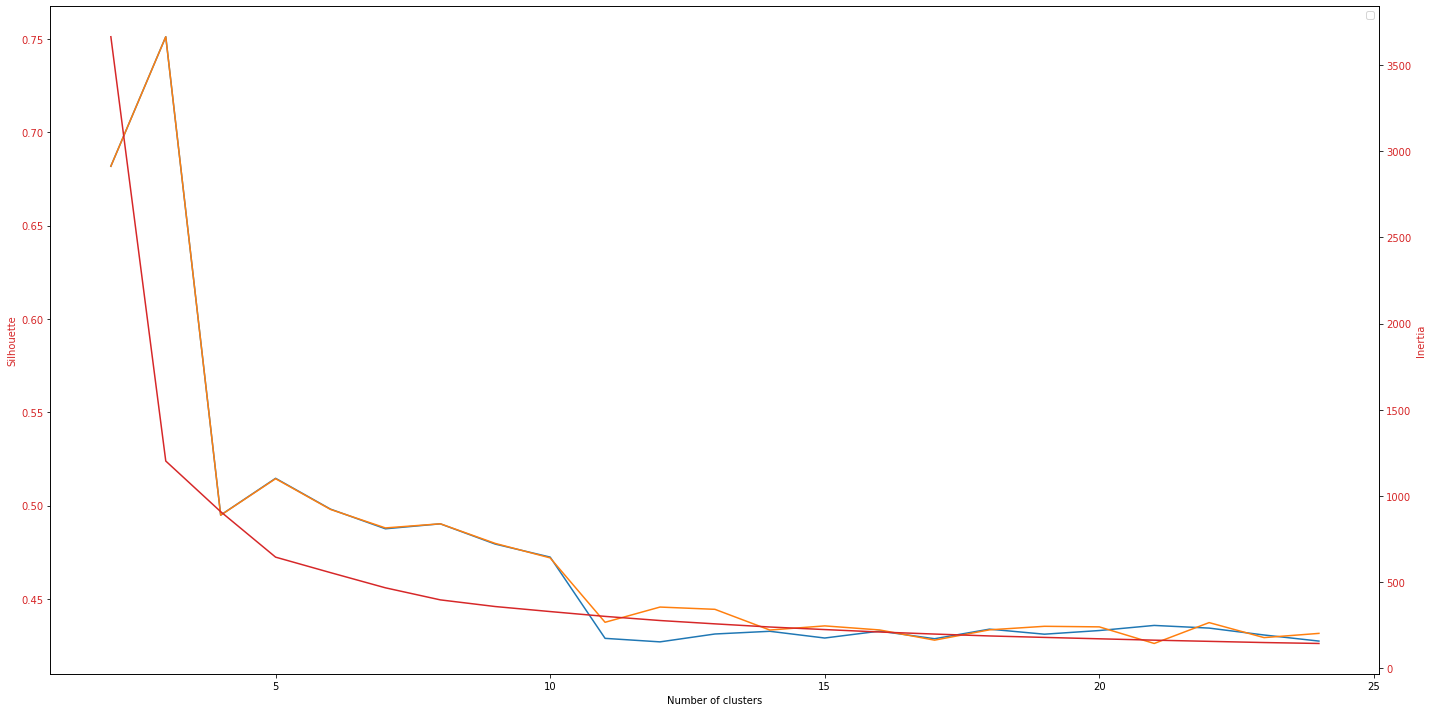

In [13]:
seeds = [42,1]
fig, ax1 = plt.subplots(figsize=(20,10))
ax1.set_xlabel('Number of clusters')
color = 'tab:red'
ax1.set_ylabel('Silhouette', color=color)
ax2 = ax1.twinx()
dist = {}
for seed in seeds:
    print('evaluate for seed:',seed)
    distortions = []
    silhouette_scores = []
    with tqdm(total=len(range(2,25))) as pbar:
        for k in range(2,25):
            k_estimator = KMeans(n_clusters=k, random_state=seed)
            fitted = k_estimator.fit_predict(pca_components)
            distortions.append(k_estimator.inertia_)
            silhouette_scores.append(silhouette_score(pca_components,fitted))
            pbar.update(1)


    ax1.plot(range(2,25), silhouette_scores, label = seed)
    ax1.tick_params(axis='y', labelcolor=color)

    dist[seed] = distortions


distortions = (np.array(dist[42])+np.array(dist[1]))/2
 
color = 'tab:red'
ax2.set_ylabel('Inertia', color=color)  
ax2.plot(range(2,25),distortions, color=color)
ax2.tick_params(axis='y', labelcolor=color)



fig.tight_layout()
plt.legend()
plt.show()

evaluate for seed: 42



evaluate for seed: 1


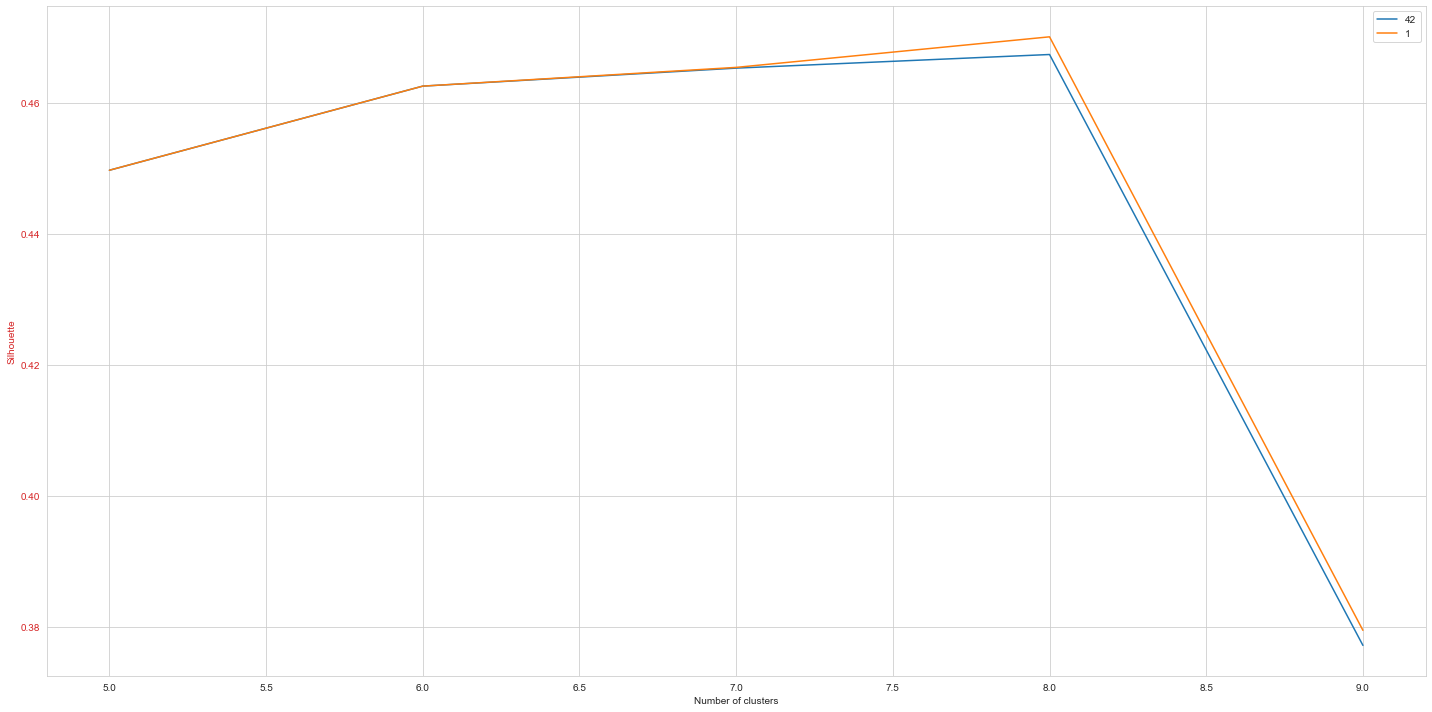

In [259]:
seeds = [42,1]
fig, ax1 = plt.subplots(figsize=(20,10))
ax1.set_xlabel('Number of clusters')
color = 'tab:red'
ax1.set_ylabel('Silhouette', color=color)
 
for seed in seeds:
    print('evaluate for seed:',seed)
    distortions = []
    silhouette_scores = []
    with tqdm(total=len(range(5,10))) as pbar:
        for k in range(5,10):
            k_estimator = KMeans(n_clusters=k, random_state=seed)
            fitted = k_estimator.fit_predict(pca_components)
            distortions.append(k_estimator.inertia_)
            silhouette_scores.append(silhouette_score(pca_components,fitted))
            pbar.update(1)


    ax1.plot(range(5,10), silhouette_scores, label = seed)
    ax1.tick_params(axis='y', labelcolor=color)



fig.tight_layout()
plt.legend()
plt.show()

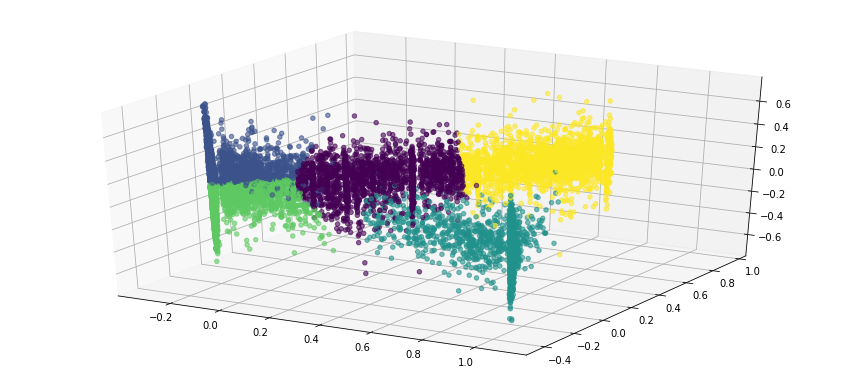

In [29]:
k_estimator = KMeans(n_clusters=5, random_state=1)
pca.fit(customers_scaled)
pca_components = pca.transform(customers_scaled)
fitted_3 = k_estimator.fit_predict(pca_components)
pca_components = pd.DataFrame(pca_components)
pca_components['CLUSTER'] = fitted_3
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(211, projection='3d')
view = ax.scatter(pca_components[0],pca_components[1],pca_components[2],alpha=0.6,
          c=pca_components['CLUSTER'],)


plt.show()

## DBSCAN

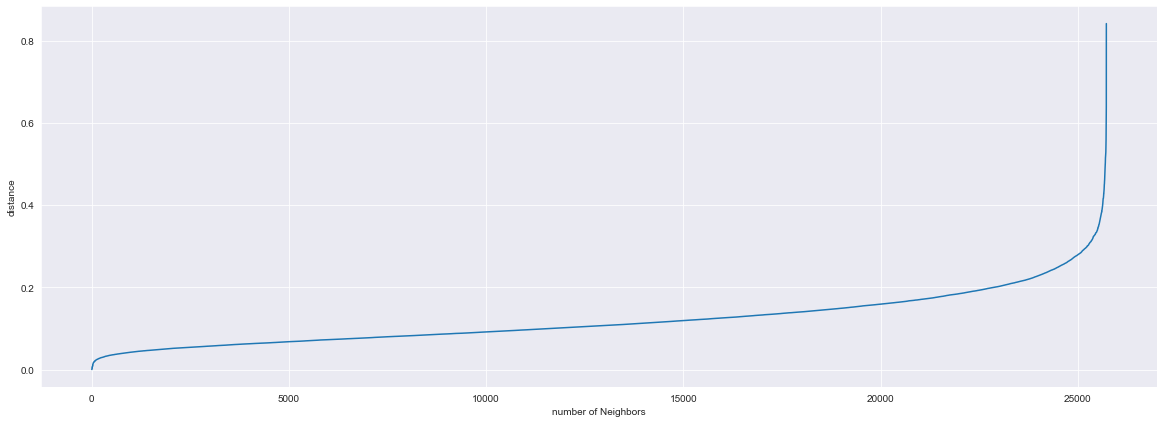

In [261]:
neigh = NearestNeighbors()
pca.fit(customers_scaled)
pca_components = pca.transform(customers_scaled)
nbrs = neigh.fit(pca_components)
distances, indices = nbrs.kneighbors(pca_components)
fig=plt.figure(figsize=(20,7))
distances = np.sort(distances, axis=0)
distances = distances[:,1]
sns.set_style('darkgrid')
plt.plot(distances);
plt.xlabel('number of Neighbors')
plt.ylabel('distance')

plt.show()

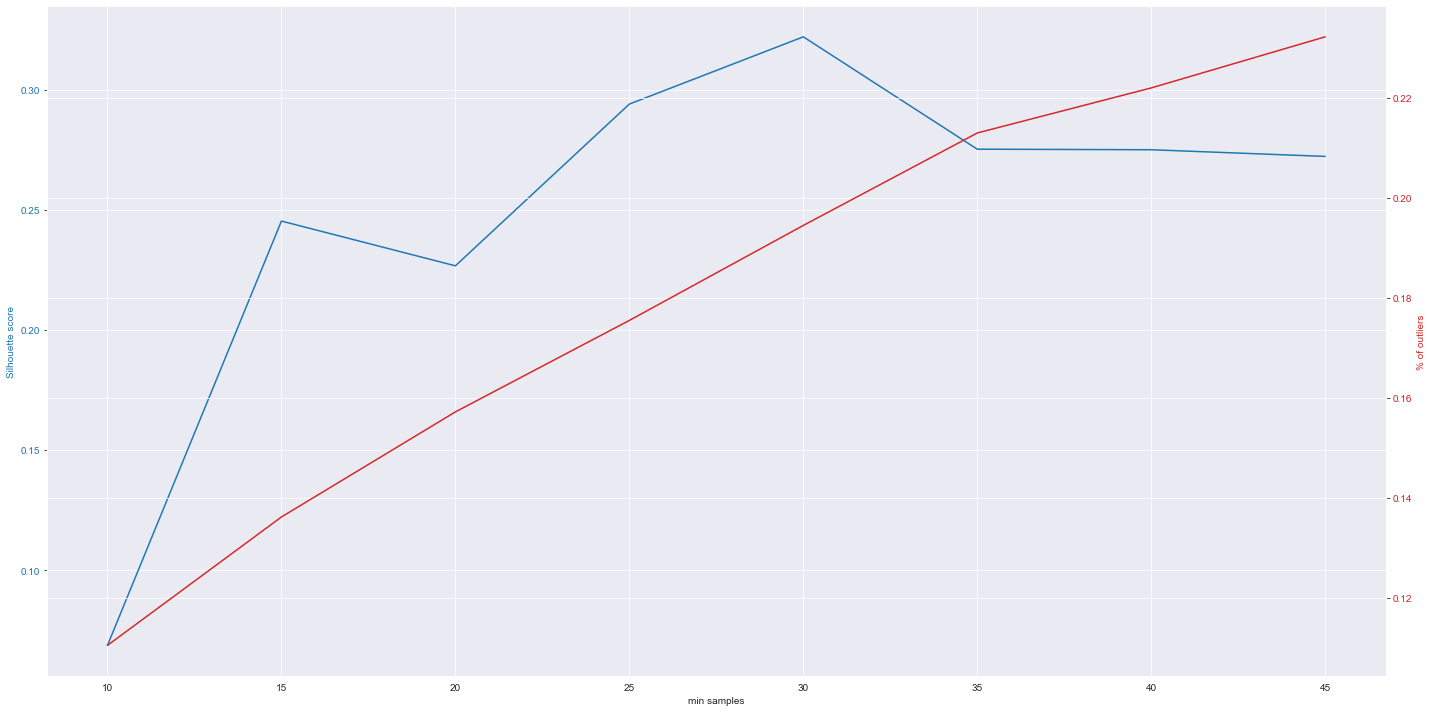

In [262]:
score = []
outliers = []
samples = np.arange(10,50, 5)
with tqdm(total=len(samples)) as pbar:
    for n in samples:
        dbs_estimator = DBSCAN(eps=0.25, min_samples=n)
        dbs_estimator.fit(pca_components)
        dbs_labels = dbs_estimator.labels_
        outliers_ = cl.Counter(dbs_labels)[-1]/(len(dbs_labels))
        score.append(silhouette_score(pca_components,dbs_labels))
        outliers.append(outliers_)
        
        pbar.update(1)

fig, ax1 = plt.subplots(figsize=(20,10))

color = 'tab:blue'
ax1.set_xlabel('min samples')
ax1.set_ylabel('Silhouette score', color=color)
ax1.plot(samples,score, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:red'
ax2.set_ylabel('% of outliers', color=color)  
ax2.plot(samples,outliers, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.show()

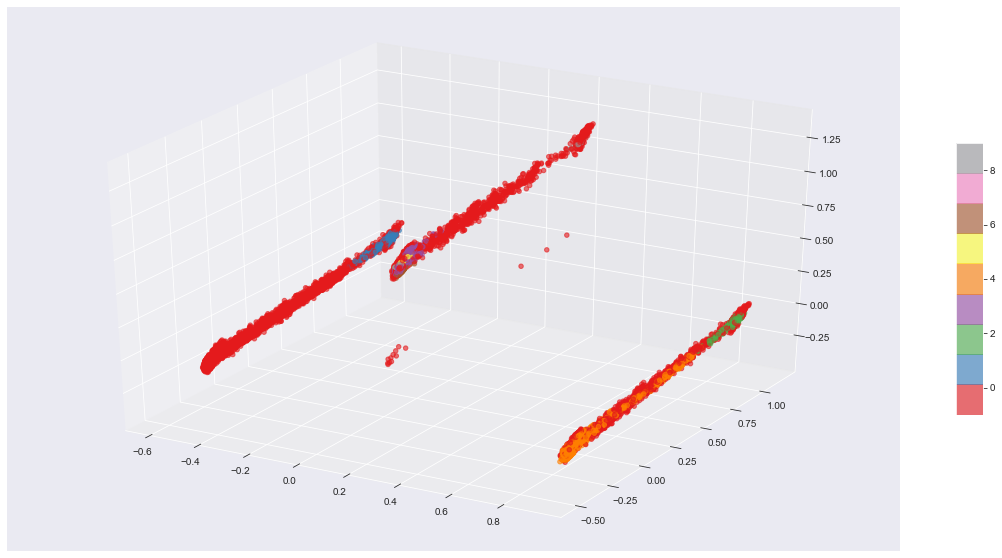

10 clusters founded, outliers in red


In [263]:
dbs_estimator = DBSCAN(eps = 0.25, min_samples=30)
pca.fit(customers_scaled)
pca_components = pca.transform(customers_scaled)
dbs_labels = dbs_estimator.fit_predict(pca_components)
pca_components = pd.DataFrame(pca_components)
pca_components['CLUSTER'] = dbs_labels
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
view = ax.scatter(pca_components[0],pca_components[1],pca_components[2],alpha=0.6,
          c=pca_components['CLUSTER'],cmap="Set1")
fig.colorbar(view, shrink=0.5, aspect=10)

plt.show()
print('{} clusters founded, outliers in red'.format(len(np.unique(dbs_labels))-1))

In [30]:
pca_components['CLUSTER'] = fitted_3

In [31]:
customers_b['CLUSTER'] = customers_b.index.map(pca_components.set_index(pca_components.index)['CLUSTER'])

/Users/pierfrancescomelucci/opt/anaconda3/envs/ENV/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


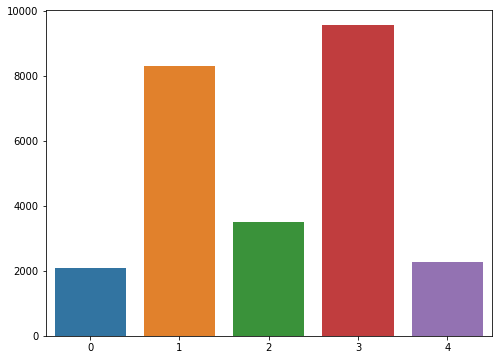

In [32]:
fig = plt.figure(figsize=(8,6))
sns.barplot(customers_b.CLUSTER.value_counts().index,
           customers_b.CLUSTER.value_counts().values);

In [33]:
customers_b.columns

Index(['CUSTOMER_ID', '2019_monthly_purchasings', 'avg_expence', 'CASH',
       'CHECK', 'CREDIT CARD', 'DEBIT CARD', 'cheap', 'expensive', 'CLUSTER'],
      dtype='object')

In [34]:
to_view = ['2019_monthly_purchasings',
                           'avg_expence',
                    'CASH', 'CHECK', 'CREDIT CARD', 'DEBIT CARD',
                        'cheap', 'expensive']

2019_monthly_purchasings
avg_expence
CASH
CHECK
CREDIT CARD
DEBIT CARD
cheap
expensive



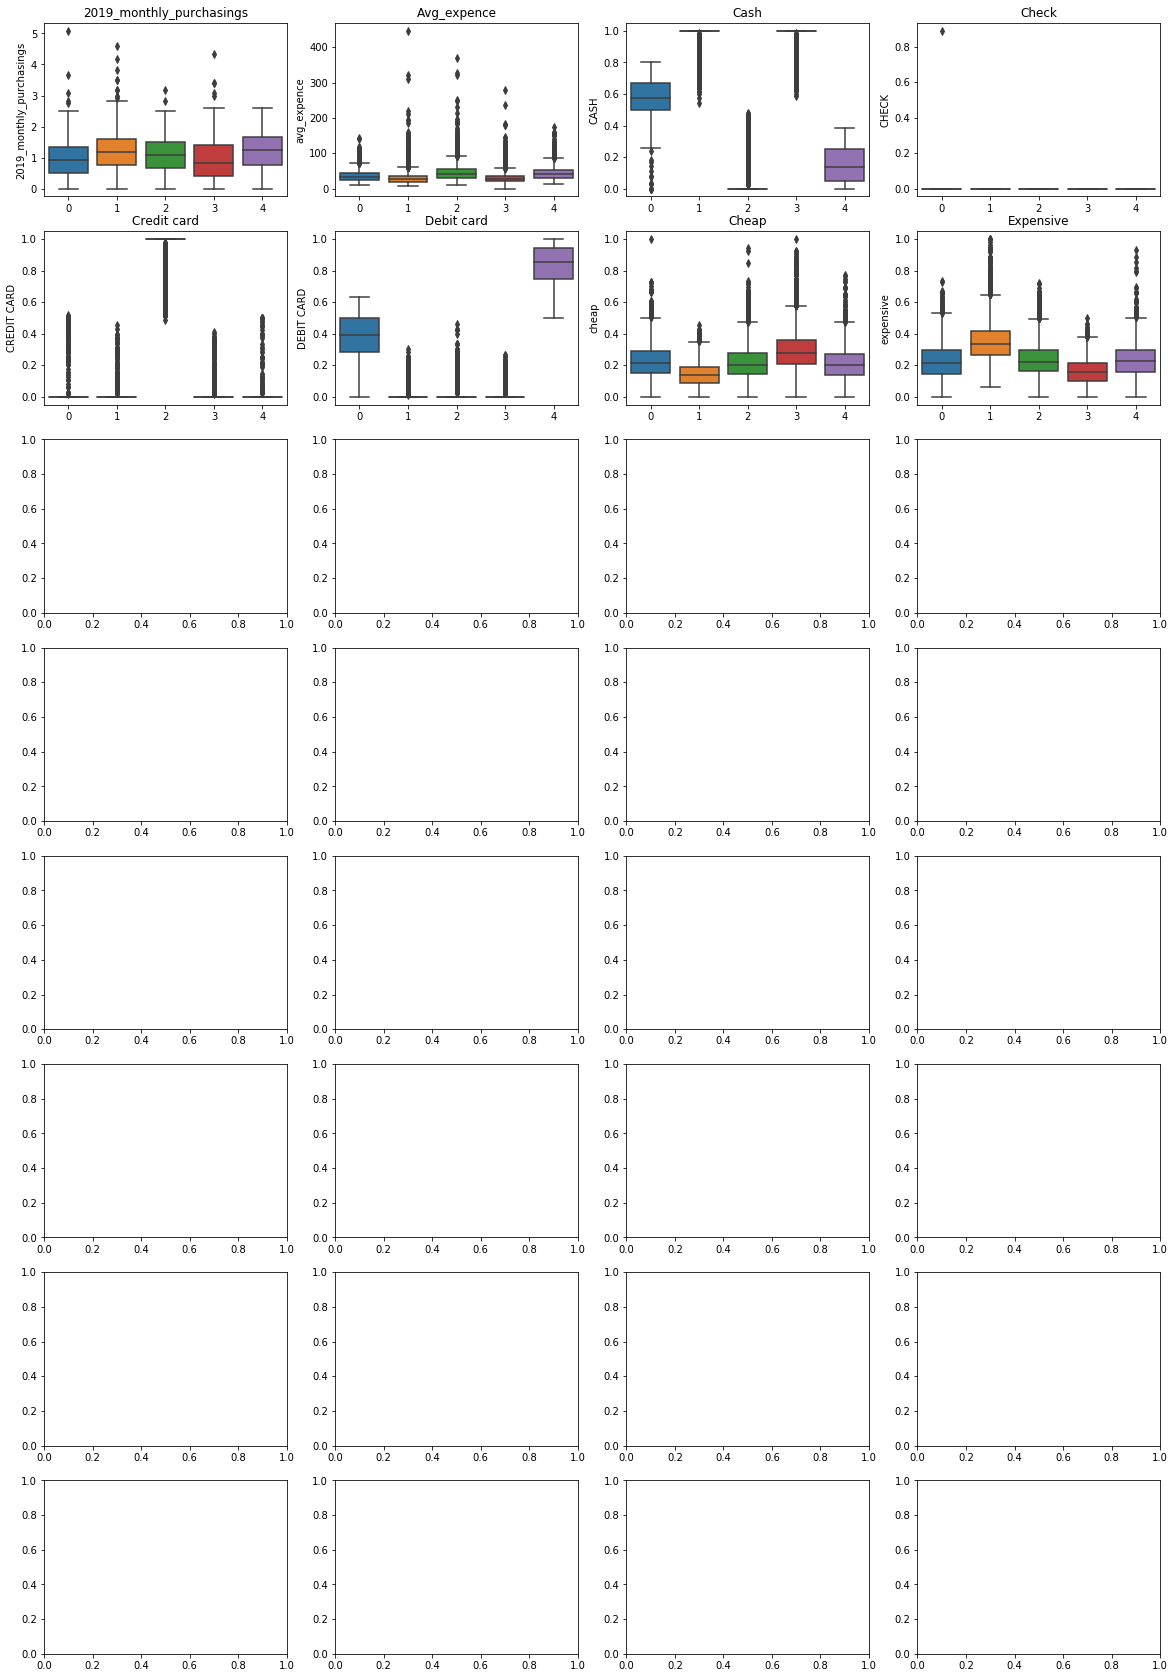

In [35]:
fig, ax = plt.subplots(figsize=(20,30), nrows=8, ncols=4)
counter = 0
with tqdm(total=len(to_view)) as pbar:
    for col in to_view:

        j = counter%4; i = counter//4;

        view_week_expence = customers_b[['CLUSTER',col]]
        view_week_expence.sort_values('CLUSTER')
        print(col)
        sns.boxplot(x='CLUSTER',y=col,data = view_week_expence,ax=ax[i,j])
        ax[i,j].set_xlabel('')
        ax[i,j].set_title(col.capitalize())


        if (col.capitalize() == 'Other_0'):
            ax[i,j].set_ylim(0,0.01)
        if (col.capitalize() == 'Sauce'):
            ax[i,j].set_ylim(0,0.05)
        if (col.capitalize() == 'Poultry'):
            ax[i,j].set_ylim(0,0.2)
        if (col.capitalize() == 'Beef_pork'):
            ax[i,j].set_ylim(0,0.1)
        if (col.capitalize() == 'Fruit'):
            ax[i,j].set_ylim(0,0.2)
        if (col.capitalize() == 'Drinks'):
            ax[i,j].set_ylim(0,0.1)
        if (col.capitalize() == 'Acquired'):
            ax[i,j].set_ylim(0,1000)
        if (col.capitalize() == 'Spent'):
            ax[i,j].set_ylim(0,10000)

        counter+=1
        pbar.update(1)

In [43]:
to_change = customers_b[customers_b.CLUSTER==0].index
customers_b.loc[to_change,'CLUSTER'] = 'Other customers'
to_change = customers_b[customers_b.CLUSTER==1].index
customers_b.loc[to_change,'CLUSTER'] = 'Cash-expensive products'
to_change = customers_b[customers_b.CLUSTER==3].index
customers_b.loc[to_change,'CLUSTER'] = 'Cash-cheap products'
to_change = customers_b[customers_b.CLUSTER==2].index
customers_b.loc[to_change,'CLUSTER'] = 'Credit card'
to_change = customers_b[customers_b.CLUSTER==4].index
customers_b.loc[to_change,'CLUSTER'] = 'Debit card'

/Users/pierfrancescomelucci/opt/anaconda3/envs/ENV/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [44]:
sales_detail = pd.read_csv('sales_detail_cluster.csv')

In [45]:
sales_detail['c_behaviour'] = sales_detail.new_c_key.map(customers_b.set_index(customers_b.index)['CLUSTER'])

In [46]:
sales_detail.to_csv('sales_detail_cluster_f.csv',header = True, index=False)

In [511]:
customers_b.to_csv('exp.csv',header = True, index=False)

# subcluster

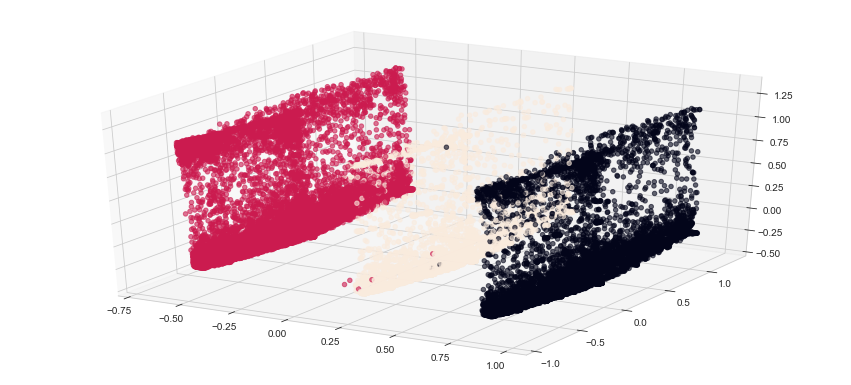

In [187]:
k_estimator = KMeans(n_clusters=3, random_state=42)
pca.fit(customers_scaled)
pca_components = pca.transform(customers_scaled)
fitted_3 = k_estimator.fit_predict(pca_components)
pca_components = pd.DataFrame(pca_components)
pca_components['CLUSTER'] = fitted_3
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(211, projection='3d')
view = ax.scatter(pca_components[0],pca_components[1],pca_components[2],alpha=0.6,
          c=pca_components['CLUSTER'],)

plt.show()

In [188]:
customers_b.columns

Index(['CUSTOMER_ID', '2019_weekly_expence', '2019_weekly_purchasings',
       '2019_monthly_expence', '2019_monthly_purchasings', 'avg_expence',
       'CASH', 'CHECK', 'CREDIT CARD', 'DEBIT CARD', 'GIFT CARD', 'afternoon',
       'launch', 'morning', 'night', 'feriale', 'weekend', 'MEMBER_GET_MEMBER',
       'PHONE', 'STORE', 'WEB', 'Fall', 'Spring', 'Summer', 'Winter',
       'Acquired', 'Spent', 'FIDELTY'],
      dtype='object')

In [189]:
customers_sub = customers[['CASH', 'CREDIT CARD', 'DEBIT CARD',
                           'afternoon','launch', 'morning', 'night',
                           'feriale', 'weekend']]

In [190]:
customers_b['MACRO'] = customers_b.index.map(pca_components.set_index(pca_components.index)['CLUSTER'])


In [193]:
scaler.fit(customers_sub)
customers_scaled_sub = scaler.transform(customers_sub)
pca = decomposition.PCA(n_components=5)
pca.fit(customers_scaled_sub)
pca_components = pca.transform(customers_scaled_sub)
pca_components=pd.DataFrame(pca_components)

In [194]:
pca_components['subcluster'] = np.zeros(len(pca_components))
pca_components['CLUSTER'] = pca_components.index.map(customers_b.set_index(customers_b.index)['MACRO'])

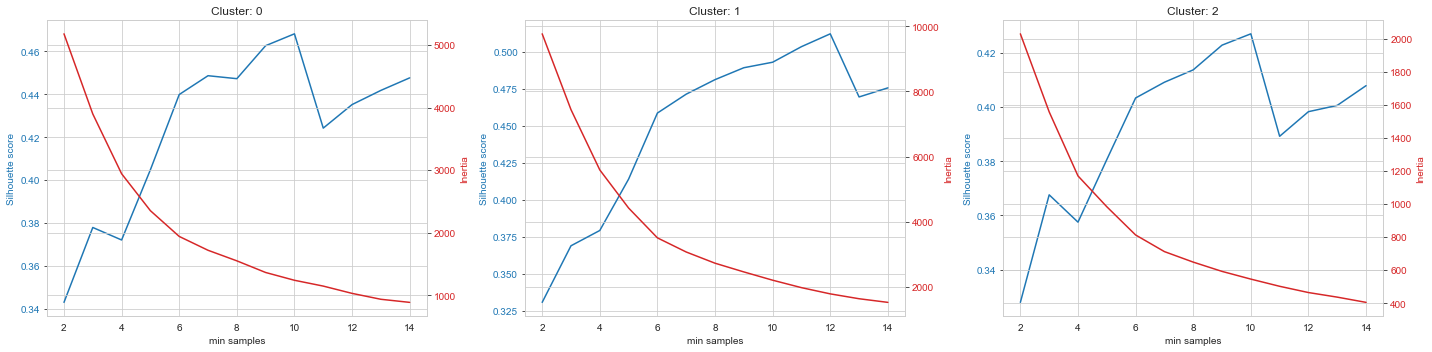

In [195]:
fig, ax = plt.subplots(figsize=(20,5), nrows=1, ncols=3)
i=0
for cluster in np.sort(pca_components.CLUSTER.unique()):
    cluster_0 = pca_components[pca_components.CLUSTER == cluster]
    cluster_0 = cluster_0.drop('CLUSTER',axis=1)
    distortions = []
    silhouette_scores = []

    with tqdm(total=len(range(2,15))) as pbar:
        for k in range(2,15):
            k_estimator = KMeans(n_clusters=k, random_state=234)
            fitted = k_estimator.fit_predict(cluster_0)
            distortions.append(k_estimator.inertia_)
            silhouette_scores.append(silhouette_score(cluster_0,fitted))
            pbar.update(1)


    color = 'tab:blue'
    ax[i].set_xlabel('min samples')
    ax[i].set_ylabel('Silhouette score', color=color)
    ax[i].plot(range(2,15),silhouette_scores, color=color)
    ax[i].tick_params(axis='y', labelcolor=color)
    ax[i].set_title('Cluster: {}'.format(cluster))
    ax2 = ax[i].twinx()  

    color = 'tab:red'
    ax2.set_ylabel('Inertia', color=color)  
    ax2.plot(range(2,15),distortions, color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  
    i+=1
    
plt.show()


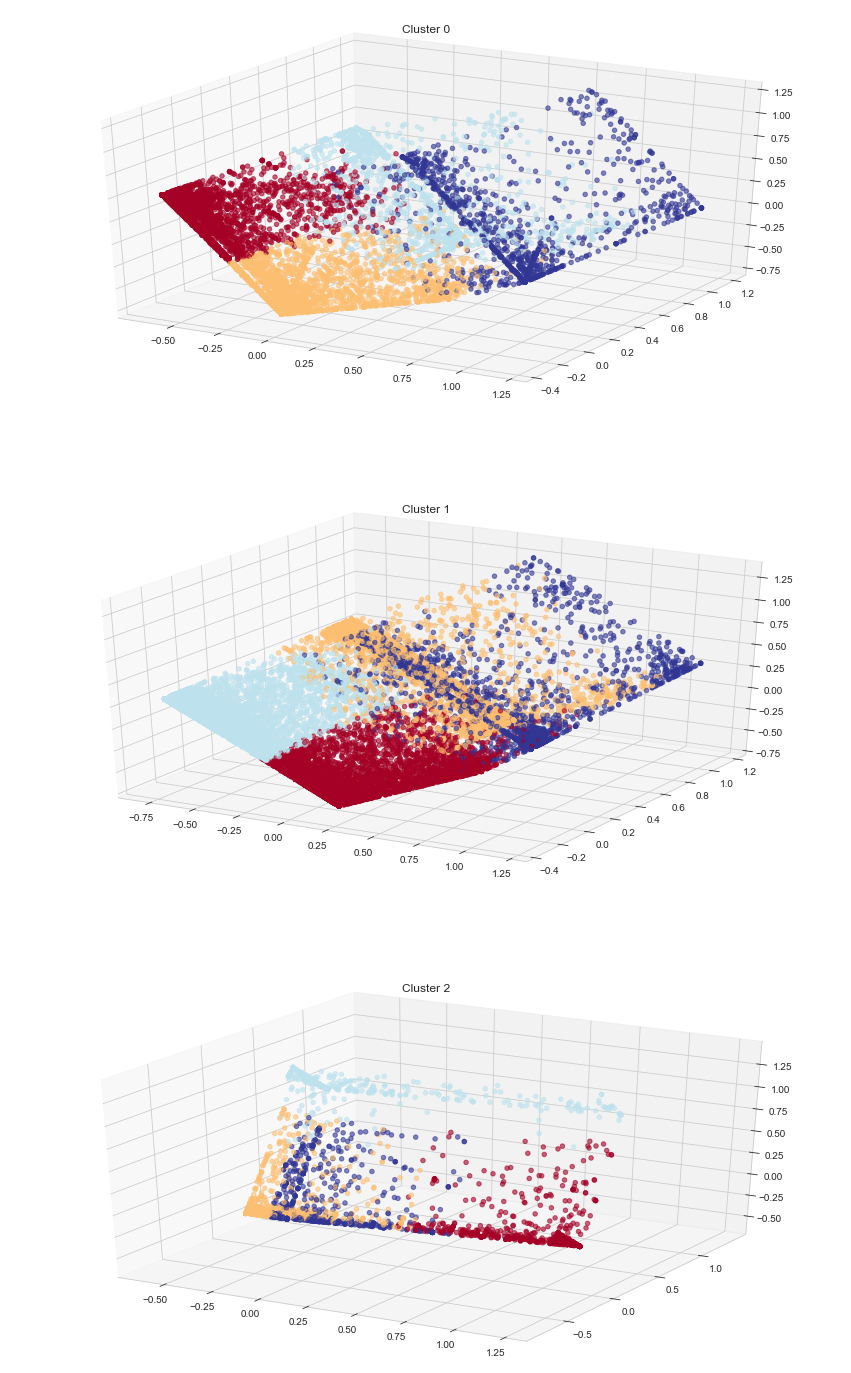

In [196]:
fig = plt.figure(figsize=(15,25))
sns.set_style('whitegrid')

                                    # cluster 0
cluster_0 = pca_components[pca_components.CLUSTER == 0]
cluster_0 = cluster_0.drop('CLUSTER',axis=1)
k_estimator = KMeans(n_clusters=4, random_state=42)
pca.fit(cluster_0)
pca_sub = pca.transform(cluster_0)
sub_cluster_0 = k_estimator.fit_predict(pca_sub)
pca_sub=pd.DataFrame(pca_sub)
pca_sub['CLUSTER'] = sub_cluster_0


ax = fig.add_subplot(311, projection='3d')
view = ax.scatter(pca_sub[0],pca_sub[1],pca_sub[2],alpha=0.6,
          c=pca_sub['CLUSTER'],cmap='RdYlBu')

ax.set_title('Cluster 0')
#ax.set_xlim(-0.8,-0.4)
                                    # cluster 1
cluster_0 = pca_components[pca_components.CLUSTER == 1]
cluster_0 = cluster_0.drop('CLUSTER',axis=1)

k_estimator = KMeans(n_clusters=4, random_state=42)

pca.fit(cluster_0)
pca_sub = pca.transform(cluster_0)
sub_cluster_1 = k_estimator.fit_predict(pca_sub)
pca_sub=pd.DataFrame(pca_sub)
pca_sub['CLUSTER'] = sub_cluster_1

ax = fig.add_subplot(312, projection='3d')
view = ax.scatter(pca_sub[0],pca_sub[1],pca_sub[2],alpha=0.6,
          c=pca_sub['CLUSTER'],cmap='RdYlBu')
ax.set_title('Cluster 1')
#ax.set_xlim(0.6,1)

                                    # cluster 2            
cluster_0 = pca_components[pca_components.CLUSTER == 2]
cluster_0 = cluster_0.drop('CLUSTER',axis=1)

k_estimator = KMeans(n_clusters=4, random_state=42)

pca.fit(cluster_0)
pca_sub = pca.transform(cluster_0)
sub_cluster_2 = k_estimator.fit_predict(pca_sub)
pca_sub=pd.DataFrame(pca_sub)
pca_sub['CLUSTER'] = sub_cluster_2

ax = fig.add_subplot(313, projection='3d')
view = ax.scatter(pca_sub[0],pca_sub[1],pca_sub[2],alpha=0.6,
          c=pca_sub['CLUSTER'],cmap='RdYlBu')

ax.set_title('Cluster 2')
plt.show()

In [197]:
                                    # cluster 0
cluster_0 = pca_components[pca_components.CLUSTER == 0]

pca_components.loc[cluster_0.index,'subcluster']=sub_cluster_0


                                    # cluster 1
cluster_1 = pca_components[pca_components.CLUSTER == 1]

add = len(np.unique(sub_cluster_0))

pca_components.loc[cluster_1.index,'subcluster']=sub_cluster_1 + add


                                    # cluster 2            
cluster_2 = pca_components[pca_components.CLUSTER == 2]

add += len(np.unique(sub_cluster_1))

pca_components.loc[cluster_2.index,'subcluster']=sub_cluster_2 + add

In [198]:
customers_b['CLUSTER'] = customers_b.index.map(pca_components.set_index(pca_components.index)['subcluster'])
customers['CLUSTER'] = customers.index.map(pca_components.set_index(pca_components.index)['subcluster'])

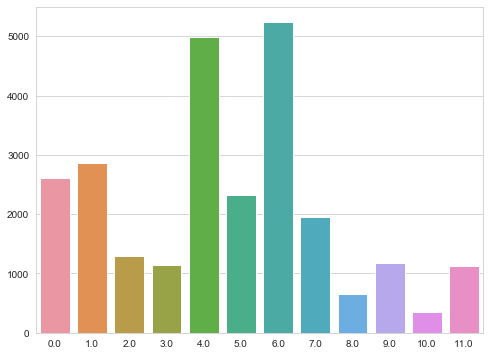

In [199]:
fig = plt.figure(figsize=(8,6))
sns.barplot(customers_b.CLUSTER.value_counts().index,
           customers_b.CLUSTER.value_counts().values);

In [200]:
to_view = ['2019_weekly_expence','avg_expence' ,
          'afternoon','launch', 'morning', 'night',
          'CASH', 'CHECK', 'CREDIT CARD', 'DEBIT CARD',
           'GIFT CARD','feriale', 'weekend','FIDELTY',
          'Acquired', 'Spent','PHONE', 'STORE', 'WEB', 'MEMBER_GET_MEMBER',
          'OTHER_0', 'OTHER_FROZEN', 'SAUCE',
           'READY-MADE', 'POULTRY', 'BEEF_PORK', 'FISH', 'FRIES', 'VEGETABLES',
           'FRUIT', 'ACCESSORIES', 'DRINKS', 'GADGETS', 'OTHER', 'OTHER_MISSING',
           'cheap', 'expensive', 'normal', 'very expensive']

In [201]:
to_view = ['CASH', 'CHECK', 'CREDIT CARD', 'DEBIT CARD', 'GIFT CARD',
                           'afternoon','launch', 'morning', 'night',
                           'feriale', 'weekend',
                             'FIDELTY',
                           'cheap', 'expensive', 'normal', 'very expensive']

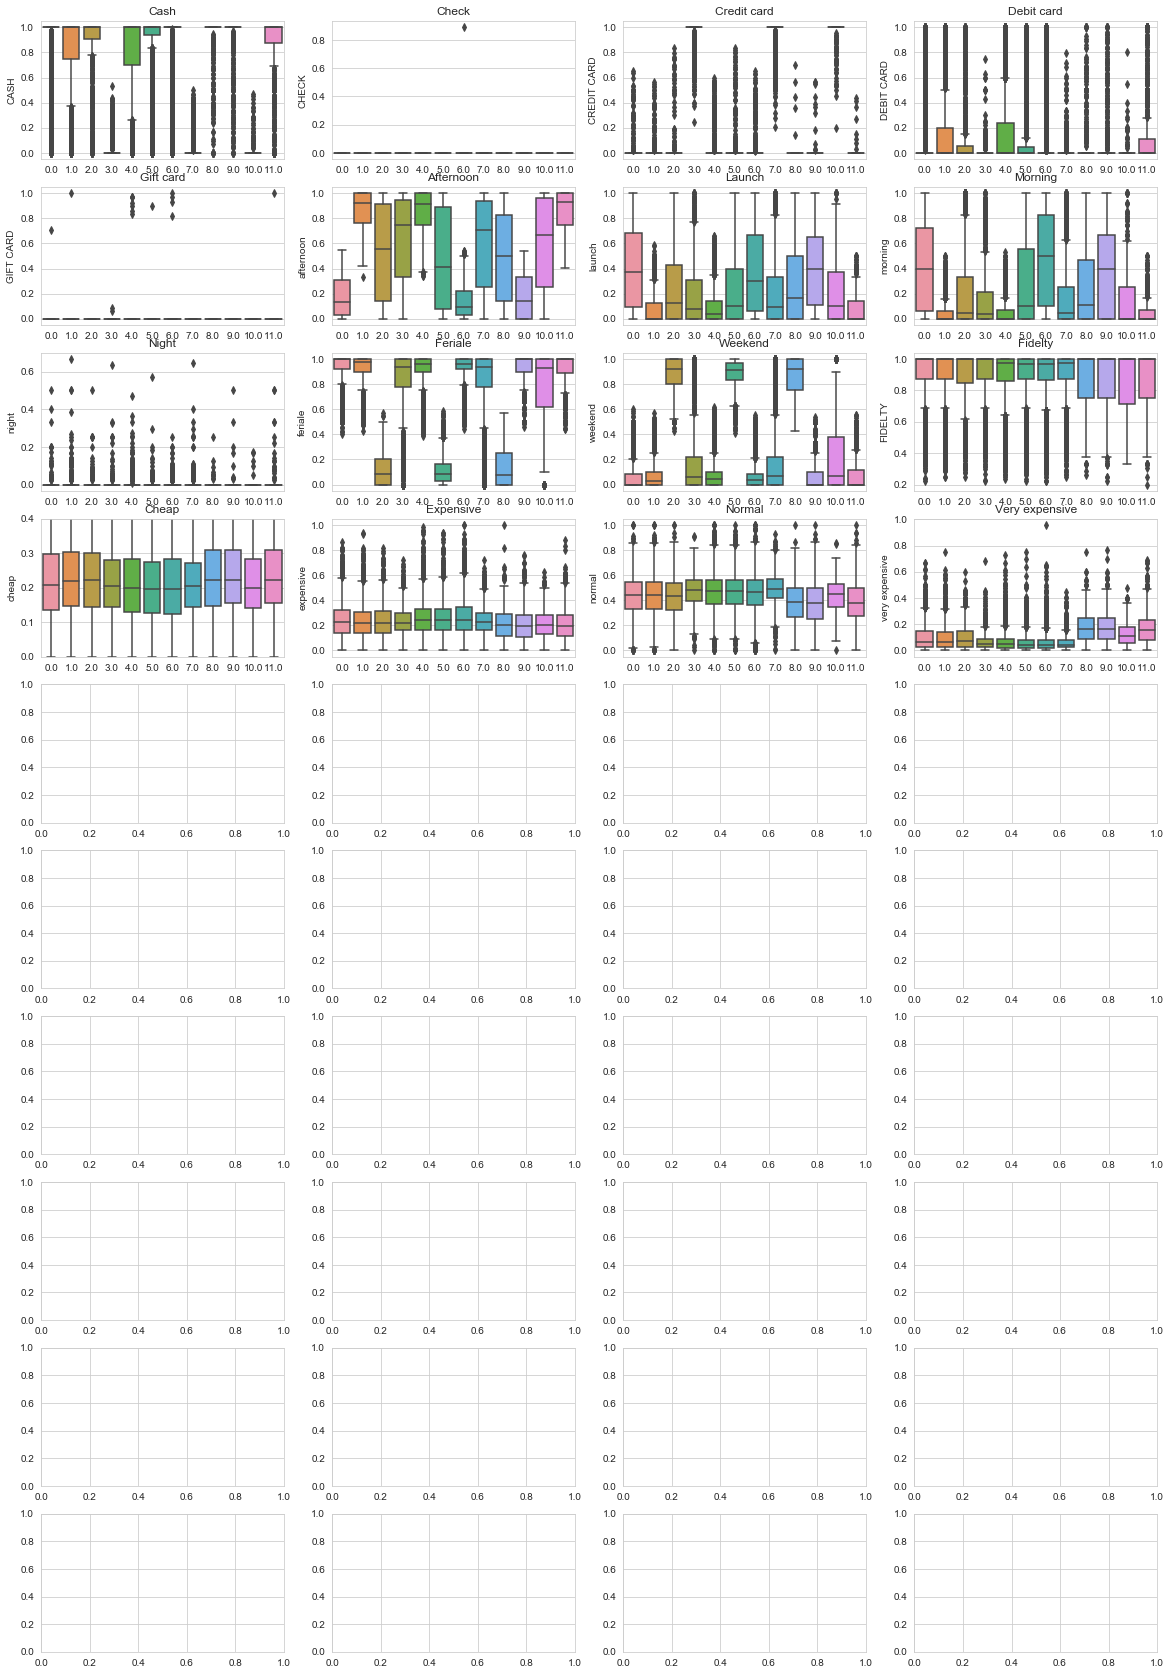

In [202]:
fig, ax = plt.subplots(figsize=(20,30), nrows=10, ncols=4)
counter = 0
with tqdm(total=len(to_view)) as pbar:
    for col in to_view:

        j = counter%4; i = counter//4;

        view_week_expence = customers[['CLUSTER',col]]
        view_week_expence.sort_values('CLUSTER')
        sns.boxplot(x='CLUSTER',y=col,data = view_week_expence,ax=ax[i,j])
        ax[i,j].set_xlabel('')
        ax[i,j].set_title(col.capitalize())


        if (col.capitalize() == 'Cheap'):
            ax[i,j].set_ylim(0,0.4)
        if (col.capitalize() == 'Sauce'):
            ax[i,j].set_ylim(0,0.01)
        if (col.capitalize() == 'Poultry'):
            ax[i,j].set_ylim(0,0.2)
        if (col.capitalize() == 'Beef_pork'):
            ax[i,j].set_ylim(0,0.1)
        if (col.capitalize() == 'Fruit'):
            ax[i,j].set_ylim(0,0.2)
        if (col.capitalize() == 'Drinks'):
            ax[i,j].set_ylim(0,0.1)
        if (col.capitalize() == 'Acquired'):
            ax[i,j].set_ylim(0,1000)
        if (col.capitalize() == 'Spent'):
            ax[i,j].set_ylim(0,10000)

        counter+=1
        pbar.update(1)